In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [340]:
path = "data/CAIT Country GHG Emissions - csv 10022017/"
file_CO2 = "CAIT Country CO2 Emissions.csv"

In [341]:
df = pd.read_csv(path+file_CO2, header=1)

In [342]:
df.columns

Index(['Country', 'Year',
       'Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)'],
      dtype='object')

In [343]:
df.dtypes

Country                                                                object
Year                                                                    int64
Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)    float64
dtype: object

In [344]:
df = df.rename(columns={"Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)" : "CO2_Emissions(MtCO2)" })

In [345]:
df

,Country,Year,CO2_Emissions(MtCO2)
0,Afghanistan,1850,NaN
1,Albania,1850,NaN
2,Algeria,1850,NaN
3,Andorra,1850,NaN
4,Angola,1850,NaN
...,...,...,...
31840,Vietnam,2014,174.5552
31841,World,2014,34701.3739
31842,Yemen,2014,24.2678
31843,Zambia,2014,4.2855


In [346]:
table = pd.pivot_table(df, values="CO2_Emissions(MtCO2)", index=["Country"],columns=["Year"], aggfunc=np.sum, dropna=True)
table.shape

(193, 165)

In [347]:
table.loc["tot/an"] = table.sum()

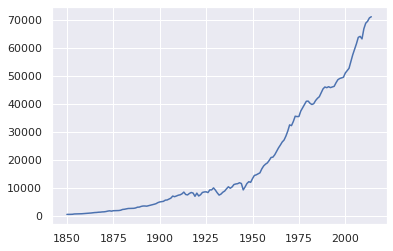

In [348]:
ax = plt.plot(table.columns, table.loc["tot/an"])

In [349]:
table["mean"] = table.iloc[:, 115:].mean(axis=1)

In [351]:
table.sort_values(by='mean', ascending=False)

Year,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,mean
Country,,,,,,,,,,,,,,,,,,,,,
tot/an,571.5458,570.5508,596.8692,620.0550,729.4476,741.4393,792.3435,800.1225,810.7357,859.1340,...,61512.5263,63807.9975,64147.9760,63250.4086,66861.5098,68855.4083,69535.7257,70756.9833,71164.0362,46497.851274
World,197.8560,197.8560,208.8480,216.1760,252.8160,260.1440,278.4640,282.1280,285.7920,304.1120,...,29417.1050,30617.3817,30835.3242,30510.3377,32305.7059,33390.2773,33726.5163,34389.5959,34701.3739,21618.559400
United States of America,19.7929,24.6331,26.7912,30.1620,33.1592,38.1606,40.0365,41.0551,41.6487,45.3200,...,5658.6235,5742.1641,5564.6861,5161.4282,5389.8354,5256.9907,5080.5159,5156.3513,5234.2406,4882.854798
European Union (28),176.7939,173.9521,180.5253,186.7797,221.6207,221.2612,236.7713,238.3139,240.9763,254.0134,...,4064.2174,4013.1948,3916.0943,3606.6143,3709.9707,3562.2538,3513.8163,3433.9393,3246.9937,3966.981272
China,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,6529.1685,7146.8460,7306.1056,7845.4218,8614.9599,9510.9401,9722.2218,10181.2409,10328.7336,3236.204734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cook Islands,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0660,0.0660,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,0.036200
Kiribati,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0696,0.0513,0.0550,0.0403,0.0623,0.0623,0.0623,0.0623,0.0623,0.032976
Liechtenstein,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0623,0.0623,0.0513,0.0550,0.0476,0.0476,0.0513,0.0440,0.008428


In [308]:
def add_n_column(dataframe, n):
    for i in range(2015, 2015+n):
        dataframe[i]= np.nan
        

fig, ax = plt.subplots()

Categories = table.index

y_pos = np.arange(len(table.index))

r_quad = table.TOTAL

ax.bar(y_pos, r_quad, align='center', alpha=0.4, width=0.5)
plt.xticks(y_pos, Categories, weight=600)
ax.set_ylabel('Risque prédictif', weight=600)
ax.set_title('Risques prédictifs modèles')
plt.show()